正確 : [6. 8.]
錯誤 : [25000 35000]


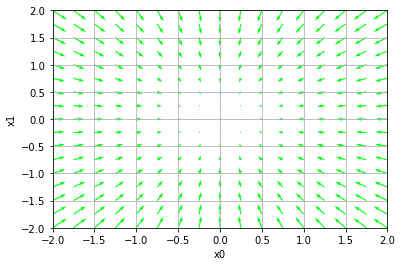

In [9]:
# 梯度 gradient
# 對 x,y各自找斜率 (各自偏微分)，然後產生梯度
# 參考 https://zh.wikipedia.org/wiki/%E6%A2%AF%E5%BA%A6

import numpy as np
import os
import matplotlib.pylab as plt

# 3D繪圖模組
from mpl_toolkits.mplot3d import Axes3D

def function_1(x):
    return x[0]**2+x[1]**2

def function_2(x):
    if x.ndim==1:
        return np.sum(x**2)
    else:
        return np.sun(x**2,axis=1)

def numercial_gradient_no_bitch(f,x):
    h = -1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxhl = f(x)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxhl-fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

def numercial_gradient(f,X):
    if X.ndim ==1 :
        return numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        # 函數參考 http://www.runoob.com/python/python-func-enumerate.html
        for idx,x in enumerate(X):
            grad[idx] = numercial_gradient_no_bitch(f,x)
        return grad

# 這裡有浮點數運算問題，但原因不明
print("正確 :",numercial_gradient_no_bitch(function_1,np.array([3.0,4.0])))
print("錯誤 :",numercial_gradient_no_bitch(function_1,np.array([3,4])))

x0 = np.arange(-2,2.5,0.25)
x1 = np.arange(-2,2.5,0.25)

# meshgrid函数用两个坐标轴上的点在平面上画格
X,Y = np.meshgrid(x0,x1)
X = X.flatten()
Y = Y.flatten()
# print((np.array([X,Y]).T).shape)

grad = numercial_gradient(function_2,np.array([X,Y]).T).T

plt.figure()
# 負號使向量向內
plt.quiver(X,Y,-grad[0],-grad[1],angles="xy",color="#00ff11")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid()
plt.draw()
plt.show()